![alt text](Task_4.png)

▶*TASK-4 : SPAM SMS DETECTION*

> Author: Hamesh Raj

> Batch: April

> Domain: Machine Learning

*Step 1: Import necessary libraries*

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder




*Step 2: Load the dataset*

In [245]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


*Step 3: Data preprocessing and data cleaning*

In [246]:
df.shape

(5572, 5)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [248]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [249]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Dropping the unwanted columns

In [250]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [251]:
# df = df.drop(columns=df.columns[2:5])
# df.head()

In [252]:
# Rename the columns "v1 and "v2" to new names
#df.columns = ['Category', 'Message']
#print(df)

new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [253]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [254]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [255]:
df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

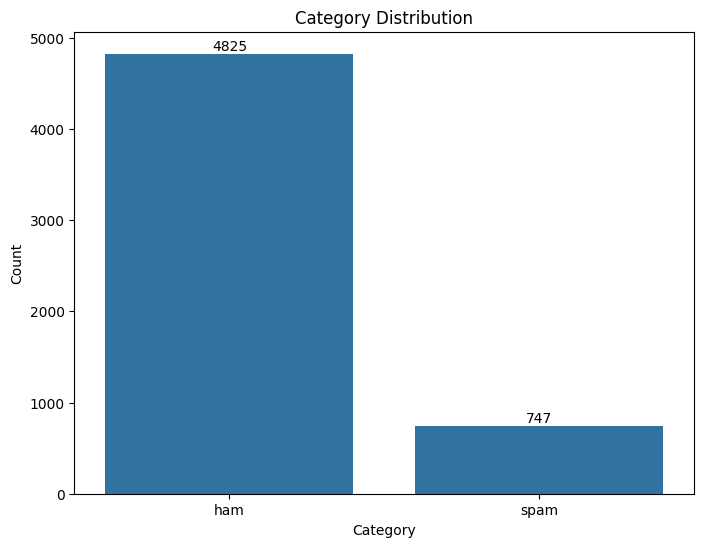

In [256]:
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [257]:
# Convert the "Category" column values to numerical representation (0 for "spam" and 1 for "ham")
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

# df['spam']= df['Category'].apply(lambda x: 0 if x=='spam' else 1)
# df = df.drop("Category", axis='columns')

df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [259]:
# Convert the "Category" column to integers
df["Category"] = df["Category"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Message   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


## Training and testing of data

In [260]:
# Separate the feature (message) and target (category) data

X = df["Message"]
y = df["Category"]

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [262]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [263]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


## Using CounVectorizer Technique and Applying the Naive Bayes Method

In [264]:
from sklearn.feature_extraction.text import CountVectorizer
featurer = CountVectorizer()
X_train_count = featurer.fit_transform(X_train.values)

In [265]:
X_train_count

<4457x7696 sparse matrix of type '<class 'numpy.int64'>'
	with 58714 stored elements in Compressed Sparse Row format>

In [266]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [267]:
X_test_count = featurer.transform(X_test)
model.score(X_test_count, y_test)

0.9919282511210762

In [268]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [269]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [270]:
clf.score(X_test,y_test)

0.9919282511210762

## Now design a pre_build model to detect spam and not spam message

In [271]:
pretrained_model =  model
# Take input from the user
user_input = input("Enter or copy a sentence from csv file and past it here: ")

# Transform the user input into features
user_input_count = featurer.transform([user_input])

# Predict whether the user input is spam (0) or not (1)
prediction = pretrained_model.predict(user_input_count)[0]

# Print the prediction
if prediction == 0:
    print(f"'{user_input}' is a spam message.")
else:
    print(f"'{user_input}' is not a spam message.")

'I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.' is not a spam message.


## 2. Using TF - IDF Technique and Applying the Logistic Regression Model

In [272]:
# Create a TF-IDF vectorizer to convert text messages into numerical features

feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)


In [273]:
# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [274]:
# Convert the target values to integers (0 and 1)

y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [275]:
print(X_train)

3978    CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
1219    True. It is passable. And if you get a high sc...
142     A swt thought: \Nver get tired of doing little...
2193    I called but no one pick up e phone. I ask bot...
2695    And whenever you and i see we can still hook u...
                              ...                        
937                              K:)k.are you in college?
5320                 But we havent got da topic yet rite?
3256    No, but you told me you were going, before you...
1179                  To day class is there are no class.
2590    Lol I have to take it. member how I said my au...
Name: Message, Length: 4457, dtype: object


In [276]:
print(X_train_features)

  (0, 1337)	0.3550885872596573
  (0, 4549)	0.2787730447179291
  (0, 399)	0.3385573052209561
  (0, 7338)	0.23194236660817694
  (0, 1485)	0.3550885872596573
  (0, 3999)	0.25211170531018084
  (0, 2383)	0.3550885872596573
  (0, 6382)	0.24467824428770515
  (0, 5395)	0.3550885872596573
  (0, 1649)	0.3550885872596573
  (1, 2446)	0.31196063816808717
  (1, 3950)	0.21745379133797185
  (1, 4174)	0.270744161203916
  (1, 5651)	0.31196063816808717
  (1, 560)	0.3486404785174168
  (1, 4961)	0.3486404785174168
  (1, 980)	0.24596353367549723
  (1, 5711)	0.3208932504411007
  (1, 3304)	0.3046621625174986
  (1, 4881)	0.3486404785174168
  (1, 6757)	0.2526508403806685
  (2, 4576)	0.21777140696167394
  (2, 3147)	0.17467158868747792
  (2, 3263)	0.25816604613306304
  (2, 1289)	0.25816604613306304
  :	:
  (4453, 5573)	0.4737223286614304
  (4453, 2080)	0.341063657932099
  (4453, 3240)	0.4584843707158112
  (4453, 3080)	0.3008048896114752
  (4454, 6661)	0.4848587324976673
  (4454, 2406)	0.6945763932412241
  (4454, 

In [277]:
# Create a logistic regression model and train it on the training data

model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [278]:
# Make predictions on the training data and calculate the accuracy

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [279]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.9665694413282477


In [280]:
# Make predictions on the test data and calculate the accuracy

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test,prediction_on_test_data)

In [281]:

print("Accuracy on test data:",accuracy_on_test_data)


Accuracy on test data: 0.9614349775784753


In [282]:
# Test the model with some custom email messages

input_your_mail = ["URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)


# Print the prediction result

if (prediction)[0] == 1:
  print("Ham Mail")
else:
  print("Spam Mail")

[0]
Spam Mail


In [283]:
# Test the model with some custom email messages

input_your_mail = ["Meeting reminder: Tomorrow, 10 AM, conference room. See you there!"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)


# Print the prediction result

if (prediction)[0] == 1:
  print("Ham Mail")
else:
  print("Spam Mail")

[1]
Ham Mail


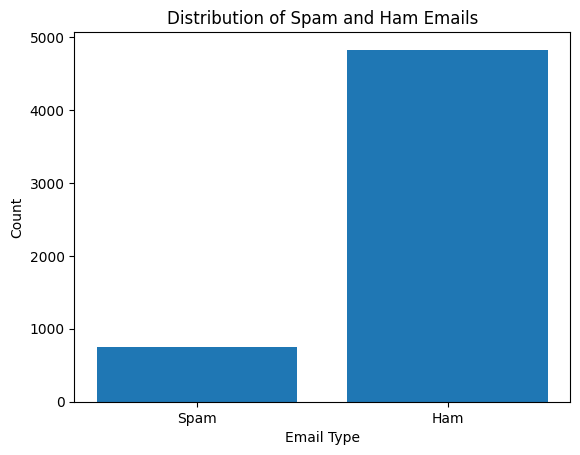

In [284]:
# Data visualization - Distribution of Spam and Ham Emails

spam_count = df[df['Category'] == 0].shape[0]
ham_count = df[df['Category'] == 1].shape[0]

plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

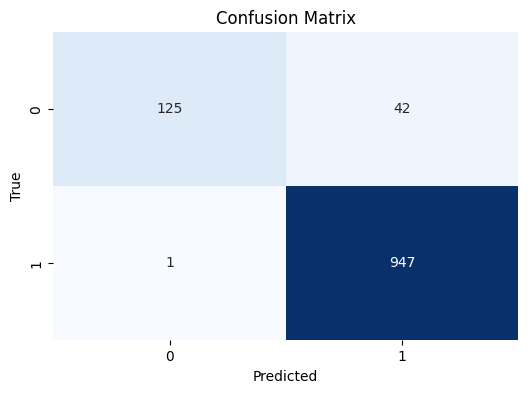

In [285]:
# Data visualization - Confusion Matrix

cm = confusion_matrix(y_test, prediction_on_test_data)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

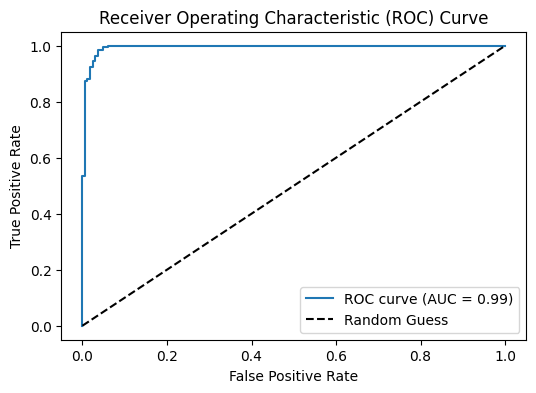

In [286]:
# Data visualization - ROC Curve

probabilities = model.predict_proba(X_test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

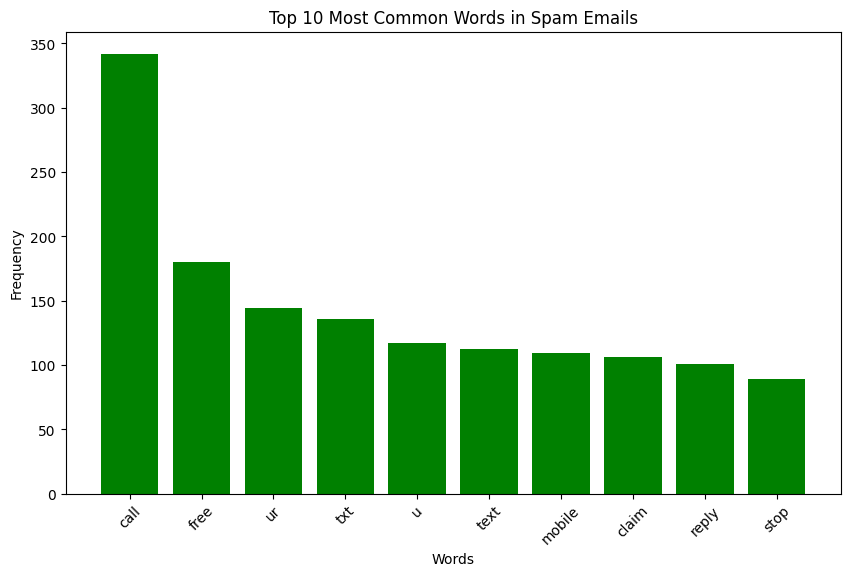

In [287]:
# Data visualization - Top 10 Most Common Words in Spam Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

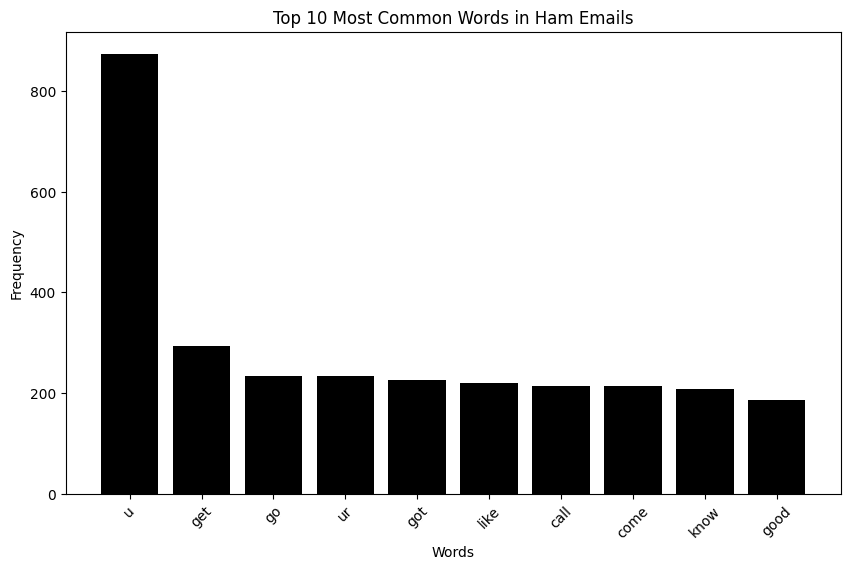

In [288]:
# Data visualization - Top 10 Most Common Words in Ham Emails

ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='k')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xticks(rotation=45)
plt.show()

# 3. Using Word Embeddings and Applying Support Vector Machine (SVM) Classifier


# Create a logistic regression model and train it on the training data

In [289]:
# Tokenize text (you can use NLTK or any other tokenizer)
# For simplicity, we'll just split the text into words
tokenized_text = df['Message'].apply(lambda x: x.split())

# Convert labels to numerical values
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
labels = df['Category'].values

# Convert tokenized text into strings
preprocessed_text = tokenized_text.apply(" ".join)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_text, labels, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit vectorizer on training data and transform training data into vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data into vectors
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predict
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Word Embeddings + SVM Classifier Accuracy:", accuracy_svm)


Word Embeddings + SVM Classifier Accuracy: 0.9829596412556054


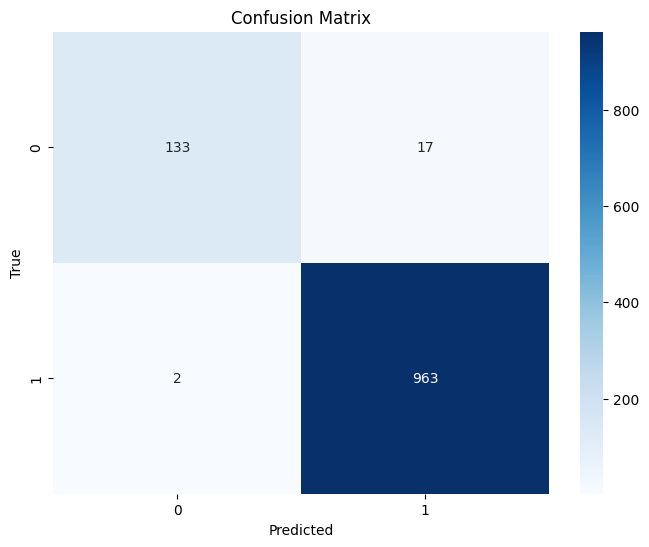

In [290]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Get labels from label encoder
labels = label_encoder.classes_

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()